In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('./dataset/justin trudeau/Trudeau-head.jpg')
img.shape

(540, 540, 3)

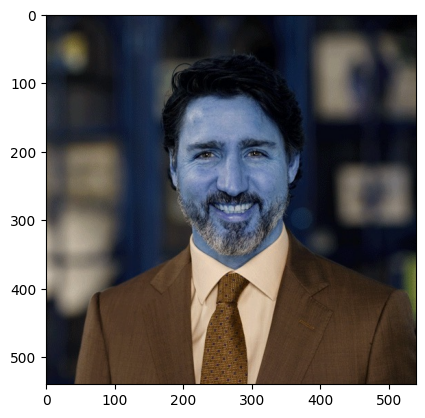

In [7]:
plt.imshow(img)

In [8]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(540, 540)

In [9]:
gray_img

array([[25, 26, 25, ...,  8,  5, 11],
       [25, 30, 27, ...,  2, 13,  3],
       [26, 24, 28, ..., 12,  2, 16],
       ...,
       [19, 18, 20, ..., 27, 28, 28],
       [20, 19, 21, ..., 26, 28, 29],
       [21, 20, 21, ..., 26, 28, 30]], dtype=uint8)

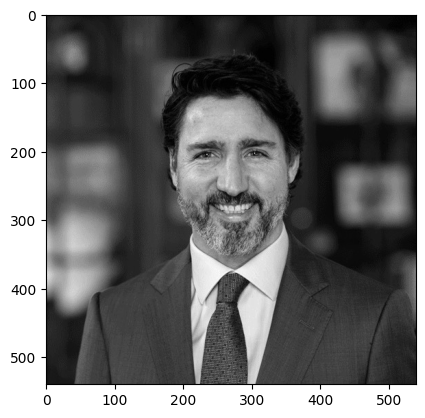

In [10]:
plt.imshow(gray_img, cmap='gray')

In [11]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.3,5)
faces

array([[163, 119, 214, 214]])

In [12]:
(x,y,w,h) = faces[0]

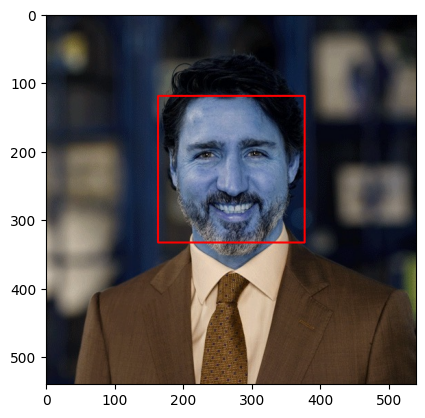

In [13]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
plt.imshow(face_img)

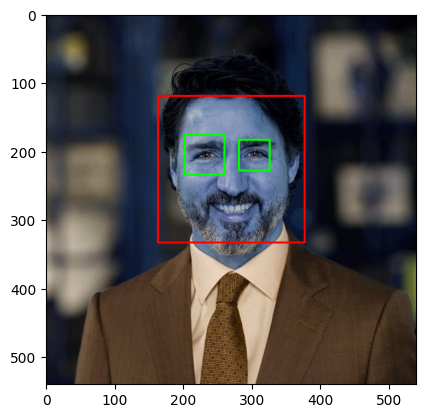

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

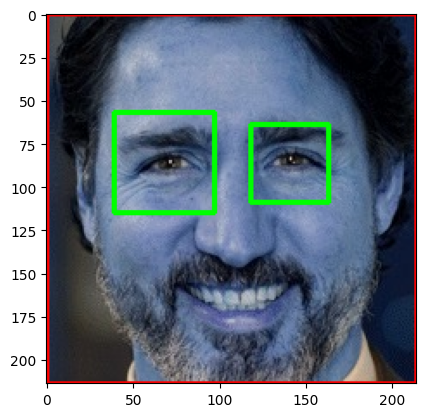

In [15]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')

In [16]:
def get_cropped_image_if_two_eyes(img_path):

    img = cv2.imread(img_path)

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

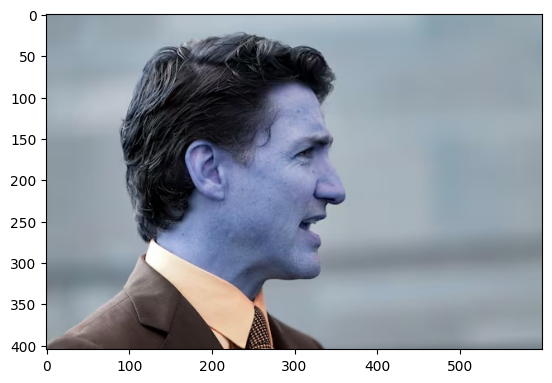

In [17]:
org_img = cv2.imread('./dataset/justin trudeau/4NH56IQVRNI4TKCT67F66JBY2Y.jpg')
plt.imshow(org_img)

In [18]:
cropped_img_2 = (get_cropped_image_if_two_eyes('./dataset/justin trudeau/4NH56IQVRNI4TKCT67F66JBY2Y.jpg'))
cropped_img_2

In [19]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./dataset/cropped',
 './dataset/joe biden',
 './dataset/justin trudeau',
 './dataset/narendra modi',
 './dataset/vladimir putin',
 './dataset/xi jinping']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    leader_name = img_dir.split('/')[-1]
    file_names_dict[leader_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_two_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder ", cropped_folder)
            cropped_file_name = leader_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            file_names_dict[leader_name].append(cropped_file_path)
            count += 1               

generating cropped images in folder  ./dataset/cropped/joe biden
generating cropped images in folder  ./dataset/cropped/justin trudeau
generating cropped images in folder  ./dataset/cropped/narendra modi
generating cropped images in folder  ./dataset/cropped/vladimir putin
generating cropped images in folder  ./dataset/cropped/xi jinping


In [24]:
# writing a function which uses wavelate and transforms the image into raw black & white image. 

In [25]:
# stack overflow 
# https://stackoverflow.com/questions/24536552/how-to-combine-pywavelet-and-opencv-for-image-processing
import numpy as np
import pywt
import cv2

def transform_image(img, mode='haar', level=1):
    imageArray = img
    # converting the image to grayscale
    imageArray = cv2.cvtColor(imageArray, cv2.COLOR_RGB2GRAY)
    # conver the image array to float
    imageArray = np.float32(imageArray)
    imageArray /= 255;
    # compute coefficients
    coeffs = pywt.wavedec2(imageArray, mode, level=level)

    #process coeffs
    coeffsH = list(coeffs)
    coeffsH[0] *= 0;

    #reconstruction
    imageArrayH = pywt.waverec2(coeffsH, mode);
    imageArrayH *= 255
    imageArrayH = np.uint8(imageArrayH)

    return imageArrayH

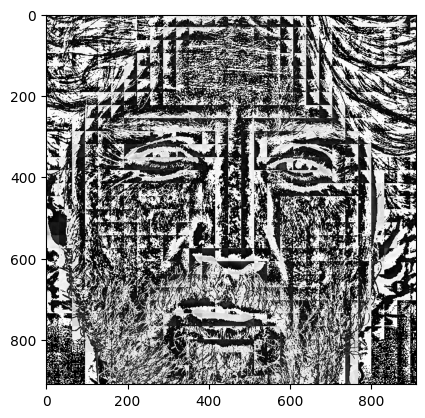

In [26]:
cropped_image = cv2.imread('./dataset/cropped/justin trudeau/justin trudeau2.png')
imageHar = transform_image(cropped_image, 'db1', 5)
plt.imshow(imageHar, cmap='gray')

In [34]:
file_names_dict = {}
for img_dir in cropped_image_dirs:
    name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    file_names_dict[name] = file_list
file_names_dict

{'joe biden': ['./dataset/cropped/joe biden\\joe biden1.png',
  './dataset/cropped/joe biden\\joe biden10.png',
  './dataset/cropped/joe biden\\joe biden11.png',
  './dataset/cropped/joe biden\\joe biden12.png',
  './dataset/cropped/joe biden\\joe biden13.png',
  './dataset/cropped/joe biden\\joe biden14.png',
  './dataset/cropped/joe biden\\joe biden15.png',
  './dataset/cropped/joe biden\\joe biden16.png',
  './dataset/cropped/joe biden\\joe biden17.png',
  './dataset/cropped/joe biden\\joe biden18.png',
  './dataset/cropped/joe biden\\joe biden19.png',
  './dataset/cropped/joe biden\\joe biden2.png',
  './dataset/cropped/joe biden\\joe biden21.png',
  './dataset/cropped/joe biden\\joe biden22.png',
  './dataset/cropped/joe biden\\joe biden23.png',
  './dataset/cropped/joe biden\\joe biden24.png',
  './dataset/cropped/joe biden\\joe biden25.png',
  './dataset/cropped/joe biden\\joe biden26.png',
  './dataset/cropped/joe biden\\joe biden27.png',
  './dataset/cropped/joe biden\\joe bid

In [35]:
number_dict = {}
count = 0
for name in file_names_dict.keys():
    number_dict[name] = count
    count += 1
number_dict

{'joe biden': 0,
 'justin trudeau': 1,
 'narendra modi': 2,
 'vladimir putin': 3,
 'xi jinping': 4}

In [36]:
# stacking the wavelet transformed image and the cropped image 
# on top of each other to give to the model. 
X = [] # image of the leader
Y = [] # name of the leader
for name, cropped_images in file_names_dict.items():
    for cropped_image in cropped_images:
        img = cv2.imread(cropped_image)
        # scalling the image into 32x32 before giving it to the model
        scalled_img = cv2.resize(img, (32, 32))
        # getting the transformed image from the function we wrote
        har_img = transform_image(img, 'db1', 5)
        # scalling the transformed image into 32x32
        scalled_har_img = cv2.resize(har_img, (32, 32))
        # now stacking on top using np.vstack
        combined_img = np.vstack((scalled_img.reshape(32*32*3,1), scalled_har_img.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(number_dict[name])

In [37]:
len(X[0])

4096

In [38]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(223, 4096)

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.875

In [42]:
len(X_test)

56

In [44]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.75      1.00      0.86        15
           2       1.00      0.20      0.33         5
           3       0.95      1.00      0.97        19
           4       1.00      0.89      0.94         9

    accuracy                           0.88        56
   macro avg       0.91      0.77      0.78        56
weighted avg       0.90      0.88      0.86        56



In [ ]:
# grid search cv to hyper tune the parameter. 